Import dan Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

Load Dataset

In [2]:
graded_csv = r"E:\DragonEye\dataset\graded_features.csv"
df = pd.read_csv(graded_csv)
df.head()

,filename,hue_mean,texture_contrast,area,hue_norm,texture_norm,area_norm,grade_score,grade_label,label_asli
0,MT1_001.jpg,0.599380,11.501189,0.193916,0.646229,0.500108,0.584758,50.000000,B,A
1,MT1_002.jpg,0.319538,10.718854,0.201515,0.285201,0.458073,0.616935,17.290295,C,A
2,MT1_003.jpg,0.698015,11.035380,0.197990,0.773480,0.475080,0.602009,50.000000,B,A
3,MT1_004.jpg,0.536735,10.130613,0.209953,0.565410,0.426466,0.652667,50.000000,B,A
4,MT1_005.jpg,0.712763,8.632451,0.196228,0.792507,0.345968,0.594547,42.289402,C,A


Evaluasi Akurasi & Confusion Matrix

===== EVALUASI HASIL GRADING =====
Akurasi : 0.4419753086419753

Confusion Matrix:
 [[ 33 146  91]
 [  0  55 215]
 [  0   0 270]]

Classification Report:
               precision    recall  f1-score   support

           A       1.00      0.12      0.22       270
           B       0.27      0.20      0.23       270
           C       0.47      1.00      0.64       270

    accuracy                           0.44       810
   macro avg       0.58      0.44      0.36       810
weighted avg       0.58      0.44      0.36       810



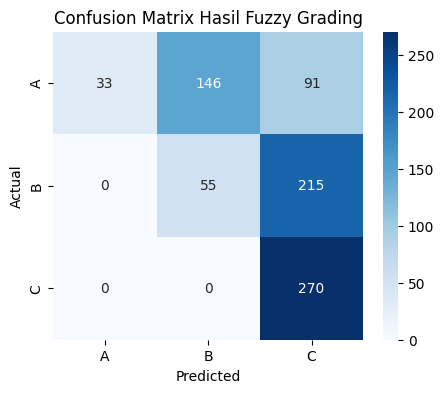

In [3]:
y_true = df['label_asli']
y_pred = df['grade_label']

print("===== EVALUASI HASIL GRADING =====")
print("Akurasi :", accuracy_score(y_true, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
print("\nClassification Report:\n", classification_report(y_true, y_pred))

cm = confusion_matrix(y_true, y_pred, labels=['A', 'B', 'C'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C'], yticklabels=['A', 'B', 'C'])
plt.title("Confusion Matrix Hasil Fuzzy Grading")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Distribusi Grade

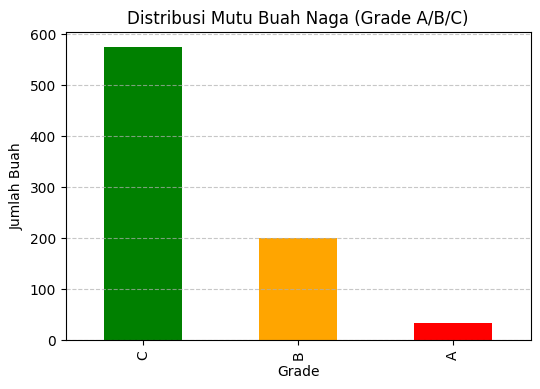

In [4]:
plt.figure(figsize=(6, 4))
df['grade_label'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribusi Mutu Buah Naga (Grade A/B/C)")
plt.xlabel("Grade")
plt.ylabel("Jumlah Buah")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi Sebaran Fitur

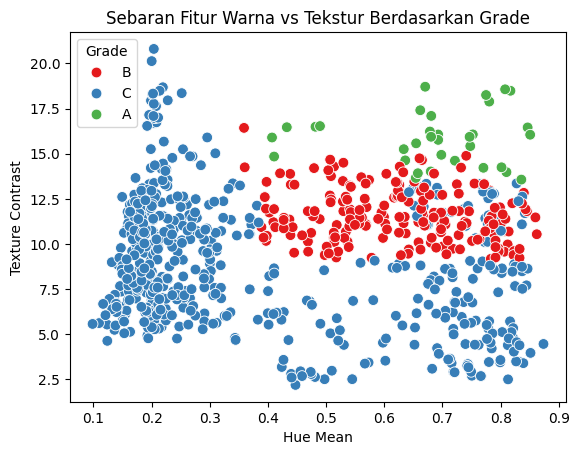

In [5]:
sns.scatterplot(data=df, x='hue_mean', y='texture_contrast',
                hue='grade_label', palette='Set1', s=60)
plt.title("Sebaran Fitur Warna vs Tekstur Berdasarkan Grade")
plt.xlabel("Hue Mean")
plt.ylabel("Texture Contrast")
plt.legend(title="Grade")
plt.show()

Tampilkan Beberapa Gambar Contoh

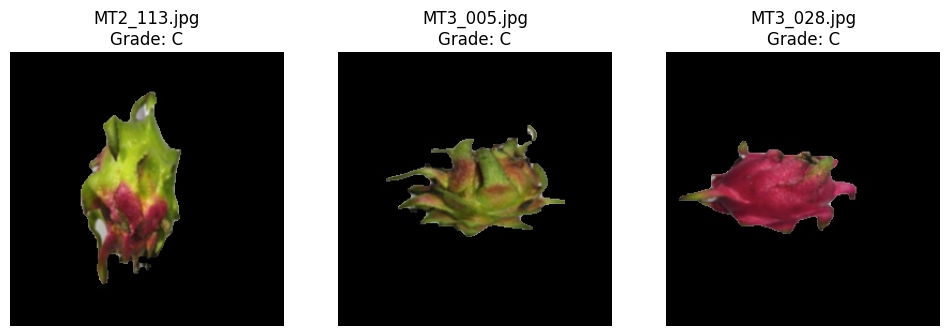

In [6]:
SEGMENTED_DIR = r"E:\DragonEye\dataset\segmented"

samples = df.sample(n=3)
plt.figure(figsize=(12, 4))
for i, (_, row) in enumerate(samples.iterrows()):
    img_path = os.path.join(SEGMENTED_DIR, row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, 3, i + 1)
        plt.imshow(img)
        plt.title(f"{row['filename']}\nGrade: {row['grade_label']}")
        plt.axis('off')
plt.show()